In [1]:
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm
from datetime import datetime
import numpy as np
from scipy import stats
# show plots in notebook
%matplotlib inline
# library settings
plt.style.use('fivethirtyeight')
#data scaling
from sklearn.preprocessing import StandardScaler
# present all output per block and not just the last line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# suppress warnings
import warnings
warnings.filterwarnings('ignore')
# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import plotly.express as px
import plotly.graph_objects as go
import helpers as hp

In [14]:
import h2o
from h2o.automl import H2OAutoML

In [2]:
df = pd.read_pickle('merged_raw_avt.pkl')

In [8]:
df = df.astype('float64')

In [17]:
df.columns

Index(['comp', 'gen', 'pump', 'idle', 'failure', 'ALQ2.D1.UAGR05.01.04',
       'ALQ2.D1.UAGR05.01.05', 'ALQ2.D1.UAGR05.01.09', 'ALQ2.D1.UAGR05.01.10',
       'ALQ2.D1.UAGR05.01.12', 'ALQ2.D1.UAGR05.02.04', 'ALQ2.D1.UAGR05.02.05',
       'ALQ2.D1.UAGR05.02.09', 'ALQ2.D1.UAGR05.02.10', 'ALQ2.D1.UAGR05.02.12',
       'ALQ2.D1.UAGR05.DER33', 'ALQ2.D1.UAGR05.DER34', 'ALQ2.D1.UAGR05.DER35',
       'ALQ2.D1.UAGR05.DER36', 'ALQ2.D1.UAGR05.DER37', 'ALQ2.D1.UAGR05.DER38',
       'ALQ2.D1.UAGR05.DER39', 'ALQ2.D1.UAGR05.DER40', 'ALQ2.D1.UAGR05.DER41',
       'ALQ2.D1.UAGR05.DER42', 'ALQ2.M1.UAGR05.09.01', 'ALQ2.M1.UAGR05.09.02',
       'ALQ2.M1.UAGR05.09.03', 'ALQ2.M1.UAGR05.09.04', 'ALQ2.M1.UAGR05.10.01',
       'ALQ2.M1.UAGR05.10.02', 'ALQ2.M1.UAGR05.10.05', 'ALQ2.M1.UAGR05.DER01',
       'ALQ2.M1.UAGR05.DER02', 'ALQ2.M1.UAGR11.09.01', 'ALQ2.M1.UAGR11.09.02',
       'ALQ2.M1.UAGR11.09.03', 'ALQ2.M1.UAGR11.09.04', 'ALQ2.M1.UAGR11.09.05',
       'ALQ2.M1.UAGR11.10.01', 'ALQ2.M1.UAGR11.10.02', 'AL

In [15]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (build 25.152-b12, mixed mode)56-b12)
  Starting server from C:\ProgramData\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\DIMAL~1\AppData\Local\Temp\tmpo9nyu0gi
  JVM stdout: C:\Users\DIMAL~1\AppData\Local\Temp\tmpo9nyu0gi\h2o_Dima_L_started_from_python.out
  JVM stderr: C:\Users\DIMAL~1\AppData\Local\Temp\tmpo9nyu0gi\h2o_Dima_L_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ---------------------------------------------------------
H2O cluster uptime:         04 secs
H2O cluster timezone:       Asia/Jerusalem
H2O data parsing timezone:  UTC
H2O cluster version:        3.26.0.10
H2O cluster version age:    27 days
H2O cluster name:           H2O_from_python_Dima_L_imeas1
H2O cluster total nodes:    1
H2O cluster free memory:    7.083 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:       {'http': None, 'https': None}
H2O internal security:      False
H2O API Extensions:         Amazon S3, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python version:             3.7.4 final
--------------------------  ---------------------------------------------------------

In [19]:
hf = h2o.H2OFrame(df[['comp', 'gen', 'pump', 'idle', 'failure', 'failure_idle', 'ALQ2.D1.UAGR05.01.05',
       'ALQ2.D1.UAGR05.DER39', 'ALQ2.M1.UAGR05.09.01', 'ALQ2.M1.UAGR05.09.02',
       'ALQ2.M1.UAGR05.09.03', 'ALQ2.M1.UAGR05.09.04']])

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [21]:
hf.describe()

Rows:2060981
Cols:12




comp gen pump idle failure failure_idle ALQ2.D1.UAGR05.01.05 ALQ2.D1.UAGR05.DER39 ALQ2.M1.UAGR05.09.01 ALQ2.M1.UAGR05.09.02 ALQ2.M1.UAGR05.09.03 ALQ2.M1.UAGR05.09.04 
 
 
 type int int int int int real real real real real real real 
 mins 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
 mean 0.012701185822541547 0.13993905249928426 0.15186375867097254 0.5588351188038286 0.1368100889415763 0.28901819085183256 0.965028685868996 8.255625266294731e-05 27.232110193345218 36.393854408061934 20.017461793043843 19.145733334668034 
 maxs 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.833333313465118 38.611396789550795 51.2090835571289 34.4388580322266 33.9188919067383 
 sigma 0.11198156896026012 0.34692387131446584 0.3588888685585747 0.4965264831135678 0.3436468329697513 0.35968928511644654 0.18364771866585272 0.006549051919514958 6.608616426403717 8.516992336171633 6.71921368361757 5.452460841723051 
 zeros 2034423 1772405 1747801 909112 1778854 1151596 71943 2058782 71943 71943 71943 71943 
 missing 386 191 226 273 190 0 1779 1779 1779 1779 1779 1779 
 0 nan nan nan nan nan 0.5 1.0 0.0 30.0206985473633 35.0612258911133 26.557472229003896 18.1783332824707 
 1 nan nan nan nan nan 0.5 1.0 0.0 30.0206985473633 35.0612258911133 26.557472229003896 18.1783332824707 
 2 nan nan nan nan nan 0.5 1.0 0.0 30.0206985473633 35.0612258911133 26.557472229003896 18.1783332824707 
 3 nan nan nan nan nan 0.5 1.0 0.0 30.0206985473633 35.0612258911133 26.557472229003896 18.1783332824707 
 4 nan nan nan nan nan 0.5 1.0 0.0 30.0206985473633 35.0612258911133 26.557472229003896 18.1783332824707 
 5 nan nan nan nan nan 0.5 1.0 0.0 30.0206985473633 35.0612258911133 26.557472229003896 18.1783332824707 
 6 nan nan nan nan nan 0.5 1.0 0.0 30.0206985473633 35.0612258911133 26.557472229003896 18.1783332824707 
 7 nan nan nan nan nan 0.5 1.0 0.0 30.0206985473633 35.0612258911133 26.557472229003896 18.1783332824707 
 8 nan nan nan nan nan 0.5 1.0 0.0 30.0206985473633 35.0612258911133 26.557472229003896 18.1783332824707 
 9 nan nan nan nan nan 0.5 1.0 0.0 30.0206985473633 35.0612258911133 26.557472229003896 18.1783332824707

In [41]:
y = "failure"
x = hf.columns
x.remove(y)
x = [item for item in x if item not in ('comp', 'gen', 'pump', 'idle', 'failure_idle')]

In [45]:
hf[y] = hf[y].asfactor()

In [49]:
aml = H2OAutoML(max_models = 10, seed = 1)
aml.train(x = x, y = y, training_frame = hf)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [51]:
aml.leaderboard

model_id auc logloss mean_per_class_error rmse mse 
 
 
 DRF_1_AutoML_20191205_082821 0.985259 0.0986491 0.0810536 0.157817 0.0249062 
 DRF_1_AutoML_20191204_151755 0.985259 0.0986491 0.0810536 0.157817 0.0249062 
 DRF_1_AutoML_20191204_205227 0.985259 0.0986491 0.0810536 0.157817 0.0249062 
 DRF_1_AutoML_20191204_224841 0.985259 0.0986491 0.0810536 0.157817 0.0249062 
 StackedEnsemble_BestOfFamily_AutoML_20191204_205227 0.985254 0.100785 0.0808195 0.156467 0.024482 
 StackedEnsemble_AllModels_AutoML_20191204_151755 0.985254 0.100785 0.0808195 0.156467 0.024482 
 StackedEnsemble_BestOfFamily_AutoML_20191204_151755 0.985254 0.100785 0.0808195 0.156467 0.024482 
 XRT_1_AutoML_20191205_082821 0.985081 0.104518 0.0805424 0.160132 0.0256421 
 GBM_5_AutoML_20191205_082821 0.984683 0.0932999 0.0780645 0.153646 0.0236071 
 GBM_grid_1_AutoML_20191205_082821_model_1 0.970615 0.37676 0.0918755 0.33533 0.112446

In [59]:
aml.leader.model_performance()


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.025571801072786955
RMSE: 0.15991185407213235
LogLoss: 0.1010960297987742
Mean Per-Class Error: 0.07135575465779898
AUC: 0.9832234774676365
pr_auc: 0.8378140397216156
Gini: 0.966446954935273

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4217723689312219: 


0         1   Error                  Rate
0      0  1762133.0   16721.0  0.0094   (16721.0/1778854.0)
1      1    43531.0  238406.0  0.1544    (43531.0/281937.0)
2  Total  1805664.0  255127.0  0.0292   (60252.0/2060791.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.421772  8.878123e-01  191.0
1                        max f2   0.221575  8.752879e-01  245.0
2                  max f0point5   0.612682  9.264202e-01  145.0
3                  max accuracy   0.453984  9.708418e-01  183.0
4                 max precision   0.999955  9.999653e-01    0.0
5                    max recall   0.000066  1.000000e+00  399.0
6               max specificity   0.999955  9.999994e-01    0.0
7              max absolute_mcc   0.435031  8.726819e-01  188.0
8    max min_per_class_accuracy   0.123130  9.151960e-01  283.0
9   max mean_per_class_accuracy   0.204986  9.286442e-01  250.0
10                      max tns   0.999955  1.778853e+06    0.0
11                      max fns   0.999955  2.530890e+05    0.0
12                      max fps   0.000066  1.778854e+06  399.0
13                      max tps   0.000066  2.819370e+05  399.0
14                      max tnr   0.999955  9.999994e-01    0.0
15                      max fnr   0.999955  8.976793e-01    0.0
16                      max fpr   0.000066  1.000000e+00  399.0
17                      max tpr   0.000066  1.000000e+00  399.0


Gains/Lift Table: Avg response rate: 13.68 %, avg score: 13.68 %


group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.013112         1.000000  7.309132   
1         2                  0.020002         0.985717  7.304255   
2         3                  0.030006         0.966347  7.270049   
3         4                  0.040049         0.952194  7.253951   
4         5                  0.050005         0.936311  7.283040   
5         6                  0.100010         0.741082  7.086536   
6         7                  0.150014         0.167128  3.415131   
7         8                  0.200019         0.122738  0.836280   
8         9                  0.300028         0.050998  0.463962   
9        10                  0.400037         0.027150  0.162149   
10       11                  0.500047         0.017034  0.041885   
11       12                  0.600056         0.011791  0.012732   
12       13                  0.700065         0.008337  0.003618   
13       14                  0.800075         0.005366  0.001880   
14       15                  0.900083         0.002268  0.000816   
15       16                  1.000000         0.000000  0.000852   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          7.309132       0.999963  1.000000                  0.999963   
1          7.307452       0.999296  0.993242                  0.999733   
2          7.294982       0.994616  0.975608                  0.998027   
3          7.284693       0.992414  0.959148                  0.996619   
4          7.284364       0.996393  0.944369                  0.996574   
5          7.185451       0.969510  0.859102                  0.983042   
6          5.928681       0.467224  0.428497                  0.811103   
7          4.655584       0.114412  0.129036                  0.636931   
8          3.258379       0.063475  0.078114                  0.445779   
9          2.484322       0.022184  0.036757                  0.339880   
10         1.995833       0.005730  0.021564                  0.273050   
11         1.665317       0.001742  0.014152                  0.227832   
12         1.427933       0.000495  0.010011                  0.195356   
13         1.249674       0.000257  0.006814                  0.170968   
14         1.110914       0.000112  0.003873                  0.151984   
15         1.000000       0.000117  0.000731                  0.136810   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           1.000000      0.095837                 0.095837  630.913195   
1           0.997672      0.050327                 0.146164  630.425463   
2           0.990316      0.072733                 0.218896  627.004932   
3           0.982501      0.072846                 0.291742  625.395060   
4           0.974908      0.072513                 0.364255  628.304044   
5           0.917005      0.354359                 0.718614  608.653622   
6           0.754170      0.170772                 0.889387  241.513067   
7           0.597887      0.041818                 0.931204  -16.371964   
8           0.424629      0.046400                 0.977605  -53.603818   
9           0.327661      0.016216                 0.993821  -83.785098   
10          0.266442      0.004189                 0.998010  -95.811525   
11          0.224393      0.001273                 0.999284  -98.726783   
12          0.193767      0.000362                 0.999645  -99.638248   
13          0.170398      0.000188                 0.999833  -99.812035   
14          0.151896      0.000082                 0.999915  -99.918428   
15          0.136792      0.000085                 1.000000  -99.914804   

    cumulative_gain  
0        630.913195  
1        630.745186  
2        629.498152  
3        628.469297  
4        628.436394  
5        618.545056  
6        492.868133  
7        365.558417  
8        225.837898  
9        148.432243  
10        99.583347  
11        66.531712  
12        42.793278  
13    

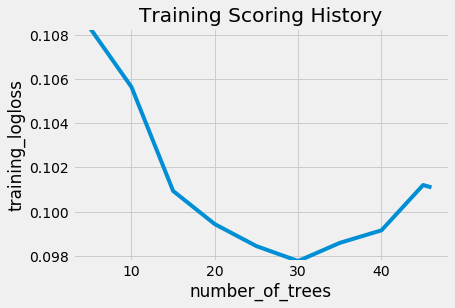

In [60]:
aml.leader.plot()

comp  gen  pump  idle  failure  ALQ2.D1.UAGR05.01.04  \
-0.116044    NaN  NaN   NaN   NaN      NaN                   NaN   
-0.059381    NaN  NaN   NaN   NaN      NaN                   NaN   
-0.042150    NaN  NaN   NaN   NaN      NaN                   NaN   
-0.022685    NaN  NaN   NaN   NaN      NaN                   NaN   
-0.016933    NaN  NaN   NaN   NaN      NaN                   NaN   
...          ...  ...   ...   ...      ...                   ...   
 71.109749   NaN  NaN   NaN   NaN      NaN                   NaN   
 71.114822   NaN  NaN   NaN   NaN      NaN                   NaN   
 71.128952   NaN  NaN   NaN   NaN      NaN                   NaN   
 71.173027   NaN  NaN   NaN   NaN      NaN                   NaN   
 71.342331   NaN  NaN   NaN   NaN      NaN                   NaN   

            ALQ2.D1.UAGR05.01.05  ALQ2.D1.UAGR05.01.09  ALQ2.D1.UAGR05.01.10  \
-0.116044                    NaN                   NaN                   NaN   
-0.059381                    NaN                   NaN                   NaN   
-0.042150                    NaN                   NaN                   NaN   
-0.022685                    NaN                   NaN                   NaN   
-0.016933                    NaN                   NaN                   NaN   
...                          ...                   ...                   ...   
 71.109749                   NaN                   NaN                   NaN   
 71.114822                   NaN                   NaN                   NaN   
 71.128952                   NaN                   NaN                   NaN   
 71.173027                   NaN                   NaN                   NaN   
 71.342331                   NaN                   NaN                   NaN   

            ALQ2.D1.UAGR05.01.12  ...  ALQ2.M1.UAGR11.10.02  \
-0.116044                    NaN  ...                   NaN   
-0.059381                    NaN  ...                   NaN   
-0.042150                    NaN  ...                   NaN   
-0.022685                    NaN  ...                   NaN   
-0.016933                    NaN  ...                   NaN   
...                          ...  ...                   ...   
 71.109749                   NaN  ...                   NaN   
 71.114822                   NaN  ...                   NaN   
 71.128952                   NaN  ...                   NaN   
 71.173027                   NaN  ...                   NaN   
 71.342331                   NaN  ...                   NaN   

            ALQ2.M1.UAGR11.10.03  ALQ2.M1.UAGR11.10.04  ALQ2.M1.UAGR11.10.05  \
-0.116044                    NaN                   NaN                   NaN   
-0.059381                    NaN                   NaN                   NaN   
-0.042150                    NaN                   NaN                   NaN   
-0.022685                    NaN                   NaN                   NaN   
-0.016933                    NaN                   NaN                   NaN   
...                          ...                   ...                   ...   
 71.109749                   NaN                   NaN                   NaN   
 71.114822                   NaN                   NaN                   NaN   
 71.128952                   NaN                   NaN                   NaN   
 71.173027                   NaN                   NaN                   NaN   
 71.342331                   NaN                   NaN                   NaN   

            ALQ2.M1.UAGR11.11.01  ALQ2.M1.UAGR11.11.02  ALQ2.M1.UAGR11.11.03  \
-0.116044                    NaN                   NaN                   NaN   
-0.059381                    NaN                   NaN                   NaN   
-0.042150                    NaN                   NaN                   NaN   
-0.022685                    NaN                   NaN                   NaN   
-0.016933                    NaN                   NaN                   NaN   
...                          ...    